In [ ]:
!pip install nbimporter

In [1]:
import ROOT
import os
import nbimporter
import utils

Welcome to JupyROOT 6.30/02


In [3]:
def makeRadiationEfficiencyPlotAll(rootFile,save_output=False,addRunNumber=False,addIntLumi=False,intLumi=0):
    
    plotPubStatus = 'Preliminary'
    sectors = ['45','56']
    stations = ['0','2']

    canvas = ROOT.TCanvas('c','c',round(104*6*1.5),round(160*4*1.5)) # Canvas sized to make the pixel proportions right
    canvas.SetRightMargin(0.125)
    canvas.Divide(2,2)

    ROOT.gStyle.SetOptStat(0)
    ROOT.gStyle.SetOptTitle(0)
    ROOT.gStyle.SetPalette(1)

    pad = 1
    
    latex = ROOT.TLatex()
    for sector in sectors:
        for station in stations:
            track_distribution_pattern = 'DQMData/Run 999999/Run summary/h2RefinedTrackEfficiency_arm{arm}_st{station}_rp3'
            hist = utils.getPlot(rootFile,sector,station,track_distribution_pattern)
            hist.SetDirectory(ROOT.gDirectory)
            hist.SetMinimum(0.7)
            st_m = '220' if station == '2' else '210'
            
            hist.GetXaxis().SetRangeUser(0,19)
            hist.GetYaxis().SetRangeUser(-8,16)
            hist.GetXaxis().SetTitleSize(0.04)
            hist.GetXaxis().SetTitleOffset(1)
            hist.GetYaxis().SetTitleSize(0.04)
            hist.GetYaxis().SetTitleOffset(1)

            canvas.cd(pad).SetRightMargin(0.125)
            pad += 1

            hist.DrawClone("colz")
            
            # Add CMS Watermark
            cmsText = '#font[61]{CMS} #scale[0.76]{#font[52]{'+plotPubStatus+'}}'
            stationTag = '{sector}-{station}-fr'.format(sector=sector,station=st_m)
            description = '#font[42]{Pixel unit efficiency - '+stationTag+'}'
            latex.SetTextAlign(11)
            latex.DrawLatexNDC(0.15,0.85,cmsText)
            latex.SetTextAlign(21)
            latex.DrawLatexNDC(0.5,0.91,description)
    
    canvas.cd(0)
    latex.SetTextAlign(22)
    if addRunNumber:
        latex.DrawLatexNDC(0.5,0.49,rootFile[-11:-5])
    if addIntLumi:
        text = '#scale[0.76]{'+'{int_lumi:.1f}'.format(int_lumi = intLumi)+' fb^{-1}}'
        latex.DrawLatexNDC(0.5,0.49,text)
    
    if save_output:
        canvas.SaveAs(outputFolder+'/rad_eff_'+rootFile[-11:-5]+'.png')
#        canvas.SaveAs(outputFolder+'/'+hist.GetName()+'.pdf')
    return canvas

In [70]:
def makeRadiationEfficiencyPlot(rootFile,sector,station,save_output=False,addRunNumber=False,addIntLumi=False,intLumi=0,z_max=0.7):
    
    plotPubStatus = 'Preliminary'

    enlarge_factor = 1.5
    canvas = ROOT.TCanvas('c','c',round(104*6*enlarge_factor),round(160*4*enlarge_factor)) # Canvas sized to make the pixel proportions right
    right_margin = 0.15
    canvas.SetRightMargin(right_margin)

    ROOT.gStyle.SetOptStat(0)
    ROOT.gStyle.SetOptTitle(0)
    ROOT.gStyle.SetPalette(1)
    
    latex = ROOT.TLatex()
    track_distribution_pattern = 'DQMData/Run 999999/Run summary/h2RefinedTrackEfficiency_arm{arm}_st{station}_rp3'
    hist = utils.getPlot(rootFile,sector,station,track_distribution_pattern)
    hist.SetDirectory(ROOT.gDirectory)
    hist.SetMinimum(z_max)
    st_m = '220' if station == '2' else '210'

    hist.GetXaxis().SetRangeUser(0,19)
    hist.GetYaxis().SetRangeUser(-8,16)
    hist.GetXaxis().SetTitleSize(0.04)
    hist.GetXaxis().SetTitleOffset(1)
    hist.GetYaxis().SetTitleSize(0.04)
    hist.GetYaxis().SetTitleOffset(1)
    hist.GetZaxis().SetTitle('Efficiency')
    hist.GetZaxis().SetTitleSize(0.04)
    hist.GetZaxis().SetTitleOffset(1.30)
    hist.DrawClone("colz")

    # Add CMS Watermark
    cmsText = '#font[61]{CMS} #scale[0.76]{#font[52]{'+plotPubStatus+'}}'
    stationTag = '#scale[0.76]{{#font[42]{{{sector}-{station}-fr}}}}'.format(sector=sector,station=st_m)
    year_energy_tag = '#scale[0.76]{#font[42]{2023 (13.6 TeV)}}'
    latex.SetTextAlign(11)
    latex.DrawLatexNDC(0.15,0.85,cmsText)
    latex.SetTextAlign(31)
    latex.DrawLatexNDC(1-right_margin-0.01,0.85,stationTag)
    latex.DrawLatexNDC(1-right_margin-0.01,0.91,year_energy_tag)

    
    latex.SetTextAlign(31)
    if addRunNumber:
        latex.DrawLatexNDC(0.865,0.85,rootFile[-11:-5])
    if addIntLumi:
        text = '#font[42]{#scale[0.76]{'+'L = {int_lumi:.1f}'.format(int_lumi = intLumi)+' fb^{-1}}}'
        latex.DrawLatexNDC(1-right_margin-0.01,0.13,text)
    
    if save_output:
        filename = '/rad_eff_{sector}_{station}_'.format(sector=sector,station=st_m)+rootFile[-11:-5]+'.png'
        canvas.SaveAs(outputFolder+filename)
#        canvas.SaveAs(outputFolder+'/'+hist.GetName()+'.pdf')
    return canvas

In [71]:
def makePlaneEfficiencyPlot(rootFile,sector,station,plane,save_output=False,addRunNumber=False,addIntLumi=False,intLumi=0):
    
    plotPubStatus = 'Preliminary'
    
    enlarge_factor = 1.5
    canvas = ROOT.TCanvas('c','c',round(104*6*enlarge_factor),round(160*4*enlarge_factor)) # Canvas sized to make the pixel proportions right
    right_margin = 0.15
    canvas.SetRightMargin(right_margin)

    ROOT.gStyle.SetOptStat(0)
    ROOT.gStyle.SetOptTitle(0)
    ROOT.gStyle.SetPalette(1)

    latex = ROOT.TLatex()
    plane_eff_pattern = 'DQMData/Run 999999/Arm{arm}/Run summary/st{station}/rp3/h2EfficiencyMap_arm{arm}_st{station}_rp3_pl'+str(plane)
    hist = utils.getPlot(rootFile,sector,station,plane_eff_pattern)
    hist.SetDirectory(ROOT.gDirectory)
    hist.SetMinimum(0.7)
    st_m = '220' if station == '2' else '210'

    hist.GetXaxis().SetRangeUser(0,19)
    hist.GetYaxis().SetRangeUser(-8,16)
    hist.GetXaxis().SetTitleSize(0.04)
    hist.GetXaxis().SetTitleOffset(1)
    hist.GetYaxis().SetTitleSize(0.04)
    hist.GetYaxis().SetTitleOffset(1)
    hist.GetZaxis().SetTitle('Efficiency')
    hist.GetZaxis().SetTitleSize(0.04)
    hist.GetZaxis().SetTitleOffset(1.30)

    hist.DrawClone("colz")

    # Add CMS Watermark
    cmsText = '#font[61]{CMS} #scale[0.76]{#font[52]{'+plotPubStatus+'}}'
    stationTag = '#scale[0.76]{{#font[42]{{{sector}-{station}-fr-{plane}}}}}'.format(sector=sector,station=st_m,plane=plane)
    year_energy_tag = '#scale[0.76]{#font[42]{2023 (13.6 TeV)}}'
    latex.SetTextAlign(11)
    latex.DrawLatexNDC(0.15,0.85,cmsText)
    latex.SetTextAlign(31)
    latex.DrawLatexNDC(1-right_margin-0.01,0.85,stationTag)
    latex.DrawLatexNDC(1-right_margin-0.01,0.91,year_energy_tag)


    canvas.cd(0)
    latex.SetTextAlign(31)
    if addRunNumber:
        latex.DrawLatexNDC(0.9,0.85,rootFile[-11:-5])
    if addIntLumi:
        text = '#font[42]{#scale[0.76]{'+'L = {int_lumi:.1f}'.format(int_lumi = intLumi)+' fb^{-1}}}'
        latex.DrawLatexNDC(1-right_margin-0.01,0.13,text)
    
    if save_output:
        filename = '/plane_eff_{sector}_{station}_{plane}_'.format(sector=sector,station=st_m,plane=plane)+rootFile[-11:-5]+'.png'
        canvas.SaveAs(outputFolder+filename)
#        canvas.SaveAs(outputFolder+'/'+hist.GetName()+'.pdf')
    return canvas

In [5]:
outputFolder = 'plots/'
grafana_table_csv = '../data/grafana_efficiency_table.csv'

In [6]:
runs = utils.get_completed_runs(grafana_table_csv)

In [7]:
runs = utils.get_completed_runs_longer_than(grafana_table_csv,200)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


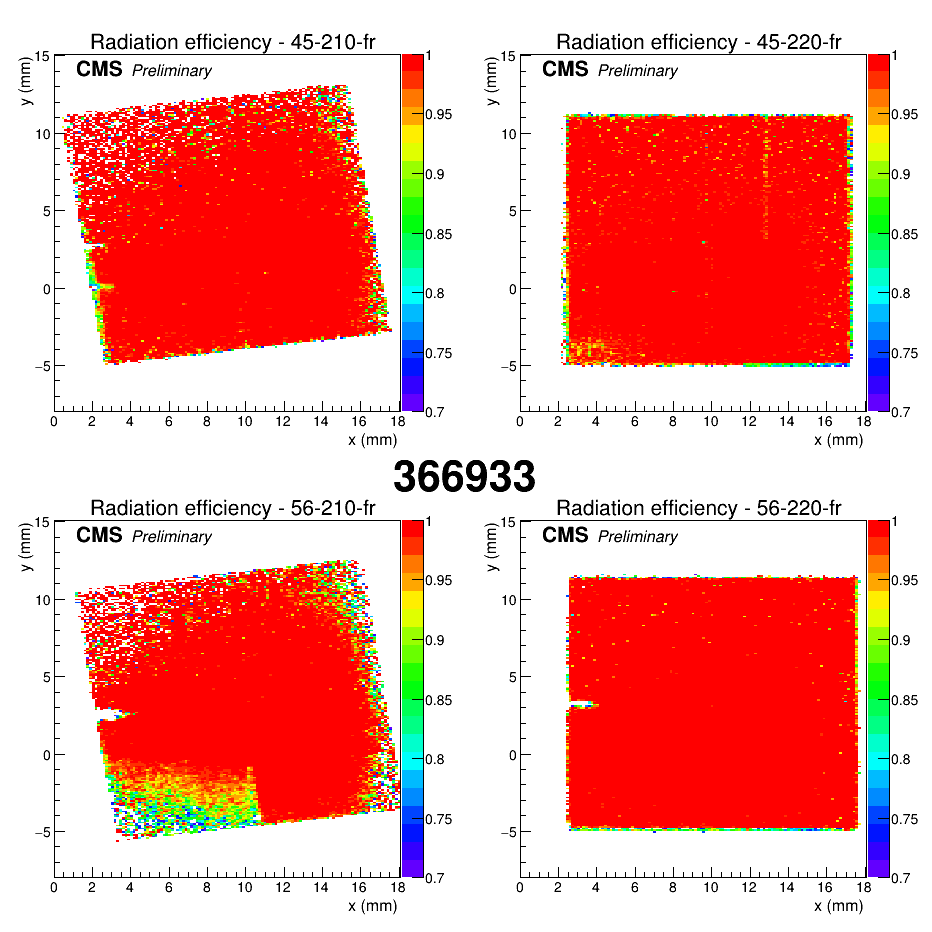

In [14]:
if not os.path.isdir(outputFolder):
    print('Folder '+outputFolder+' not found. Creating it...')
    os.mkdir(outputFolder)

rootFile_pattern = '/eos/cms/store/group/dpg_ctpps/comm_ctpps/pps-automation/dev/pps-test-re-tracking-efficiency/test_efficiency_era/pps-test-re-tracking-efficiency/{run}/outputTrackingEfficiency_run{run}.root'

for run in runs:
    
    rootFile = rootFile_pattern.format(run=run)
    c = makeRadiationEfficiencyPlotAll(rootFile,False,addRunNumber=True)
    c.Draw()
    break

In [ ]:
from PIL import Image

filenames = [outputFolder+'rad_eff_'+str(run)+'.jpg' for run in runs]

def make_gif():
    frames = [Image.open(image) for image in filenames]
    frame_one = frames[0]
    frame_one.save(outputFolder+'RadiationEfficiency.gif', format="GIF", append_images=frames,
               save_all=True, duration=500, loop=0)
    
make_gif()
for filename in filenames:
    os.remove(filename)

## Try using lumi too

In [10]:
import pandas as pd

def fillDataFrame(csv_file):
    # Initialize empty lists for each column
    runs = []
    fills = []
    LSs = []
    dates = []
    del_lumis = []
    rec_lumis = []
    
    print('Parsing',csv_file+'...')
    # Open the CSV file for reading
    with open(csv_file, 'r') as file:
        # Iterate through each line in the file
        for line in file:
            # Check if the line does not start with '#'
            if not line.startswith('#'):
                # Split the line by commas
                parts = line.strip().split(',')

                # Extract the relevant information and append to the respective lists
                run_fill = parts[0].split(':')
                runs.append(int(run_fill[0]))
                fills.append(int(run_fill[1]))
                LSs.append(int(parts[1].split(':')[1]))
                dates.append(parts[2])
                del_lumis.append(float(parts[5]))
                rec_lumis.append(float(parts[6]))

    # Create a Pandas DataFrame from the lists
    df = pd.DataFrame({
        'run': runs,
        'fill': fills,
        'LS': LSs,
        'date': dates,
        'del_lumi': del_lumis,
        'rec_lumi': rec_lumis
    })

    # Add a cumulative sum column for del_lumi
    df['integrated_del_lumi'] = df['del_lumi'].cumsum()
    df['integrated_rec_lumi'] = df['rec_lumi'].cumsum()
    df['date'] = pd.to_datetime(df['date'])

    return df

In [11]:
pps_2023_track_csv = '../data/pps_track_only_2023.csv'
pps_2023_track_df = fillDataFrame(pps_2023_track_csv)

Parsing ../data/pps_track_only_2023.csv...


In [50]:
if not os.path.isdir(outputFolder):
    print('Folder '+outputFolder+' not found. Creating it...')
    os.mkdir(outputFolder)

rootFile_pattern = '/eos/cms/store/group/dpg_ctpps/comm_ctpps/pps-automation/dev/pps-test-re-tracking-efficiency/test_efficiency_era/pps-test-re-tracking-efficiency/{run}/outputTrackingEfficiency_run{run}.root'

for run in runs:
    rootFile = rootFile_pattern.format(run=run)
    foundLumi = False
    lumiRun = run
    while not foundLumi:
        try:
            intLumi = float(pps_2023_track_df[pps_2023_track_df['run'] == lumiRun].iloc[[0]]['integrated_del_lumi'])
            foundLumi = True
        except IndexError as e:
            lumiRun += 1
            
    if lumiRun != run:
        print('Found no lumi for run '+str(run)+'. Used lumi from run '+str(lumiRun))
    c = makeRadiationEfficiencyPlotAll(rootFile,True,addRunNumber=False,addIntLumi=True,intLumi=intLumi)
    #c.Draw()
    #break

NameError: name 'makeRadiationEfficiencyPlotAll' is not defined

In [83]:
from PIL import Image

filenames = [outputFolder+'rad_eff_'+str(run)+'.png' for run in runs]

def make_gif():
    frames = [Image.open(image) for image in filenames]
    frame_one = frames[0]
    frame_one.save(outputFolder+'RadiationEfficiency_lumi_mt200pb.gif', format="GIF", append_images=frames,
               save_all=True, duration=500, loop=0)
    
make_gif()
#for filename in filenames:
#    os.remove(filename)

In [40]:
if not os.path.isdir(outputFolder):
    print('Folder '+outputFolder+' not found. Creating it...')
    os.mkdir(outputFolder)

rootFile_pattern = '/eos/cms/store/group/dpg_ctpps/comm_ctpps/pps-automation/dev/pps-test-re-tracking-efficiency/test_efficiency_era/pps-test-re-tracking-efficiency/{run}/outputEfficiencyAnalysisDQMHarvester_run{run}.root'

for run in runs:
    rootFile = rootFile_pattern.format(run=run)
    foundLumi = False
    lumiRun = run
    while not foundLumi:
        try:
            intLumi = float(pps_2023_track_df[pps_2023_track_df['run'] == lumiRun].iloc[[0]]['integrated_del_lumi'])
            foundLumi = True
        except IndexError as e:
            lumiRun += 1
            
    if lumiRun != run:
        print('Found no lumi for run '+str(run)+'. Used lumi from run '+str(lumiRun))
        
    c = makePlaneEfficiencyPlot(rootFile,'56','2','2',True,addRunNumber=False,addIntLumi=True,intLumi=intLumi)
    c.DrawClone()
    break

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file plots//plane_eff_56_220_2366933.png has been created


In [64]:
from PIL import Image

filenames = [outputFolder+'plane_eff_'+str(run)+'.png' for run in runs]

def make_gif():
    frames = [Image.open(image) for image in filenames]
    frame_one = frames[0]
    frame_one.save(outputFolder+'PlaneEfficiency_lumi_mt200pb.gif', format="GIF", append_images=frames,
               save_all=True, duration=500, loop=0)
    
make_gif()
#for filename in filenames:
#    os.remove(filename)

In [73]:
# Generate all pixel unit efficiency 45-210-fr
sector = '45'
station = '0'

if not os.path.isdir(outputFolder):
    print('Folder '+outputFolder+' not found. Creating it...')
    os.mkdir(outputFolder)

rootFile_pattern = '/eos/cms/store/group/dpg_ctpps/comm_ctpps/pps-automation/dev/pps-test-re-tracking-efficiency/test_efficiency_era/pps-test-re-tracking-efficiency/{run}/outputTrackingEfficiency_run{run}.root'

for run in runs:
    rootFile = rootFile_pattern.format(run=run)
    foundLumi = False
    lumiRun = run
    while not foundLumi:
        try:
            intLumi = float(pps_2023_track_df[pps_2023_track_df['run'] == lumiRun].iloc[[0]]['integrated_del_lumi'])
            foundLumi = True
        except IndexError as e:
            lumiRun += 1

    if lumiRun != run:
        print('Found no lumi for run '+str(run)+'. Used lumi from run '+str(lumiRun))

    c = makeRadiationEfficiencyPlot(rootFile,sector,station,True,addRunNumber=False,addIntLumi=True,intLumi=intLumi)
#c.DrawClone()

Found no lumi for run 368765. Used lumi from run 368822


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file plots//rad_eff_45_210_366933.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file plots//rad_eff_45_210_367112.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file plots//rad_eff_45_210_367232.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file plots//rad_eff_45_210_367264.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file plots//rad_eff_45_210_367270.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file plots//rad_eff_45_210_367315.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in

In [83]:
# Generate all pixel unit efficiency 56-220-fr
sector = '56'
station = '2'

if not os.path.isdir(outputFolder):
    print('Folder '+outputFolder+' not found. Creating it...')
    os.mkdir(outputFolder)

rootFile_pattern = '/eos/cms/store/group/dpg_ctpps/comm_ctpps/pps-automation/dev/pps-test-re-tracking-efficiency/test_efficiency_era/pps-test-re-tracking-efficiency/{run}/outputTrackingEfficiency_run{run}.root'

for run in runs:
    rootFile = rootFile_pattern.format(run=run)
    foundLumi = False
    lumiRun = run
    while not foundLumi:
        try:
            intLumi = float(pps_2023_track_df[pps_2023_track_df['run'] == lumiRun].iloc[[0]]['integrated_del_lumi'])
            foundLumi = True
        except IndexError as e:
            lumiRun += 1

    if lumiRun != run:
        print('Found no lumi for run '+str(run)+'. Used lumi from run '+str(lumiRun))

    c = makeRadiationEfficiencyPlot(rootFile,sector,station,True,addRunNumber=False,addIntLumi=True,intLumi=intLumi,z_max=0.3)
#c.DrawClone()

Found no lumi for run 368765. Used lumi from run 368822


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file plots//rad_eff_56_220_366933.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file plots//rad_eff_56_220_367112.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file plots//rad_eff_56_220_367232.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file plots//rad_eff_56_220_367264.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file plots//rad_eff_56_220_367270.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file plots//rad_eff_56_220_367315.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in

# Final plots for approval

## Plane efficiency plots

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file plots//plane_eff_45_210_0_366933.png has been created


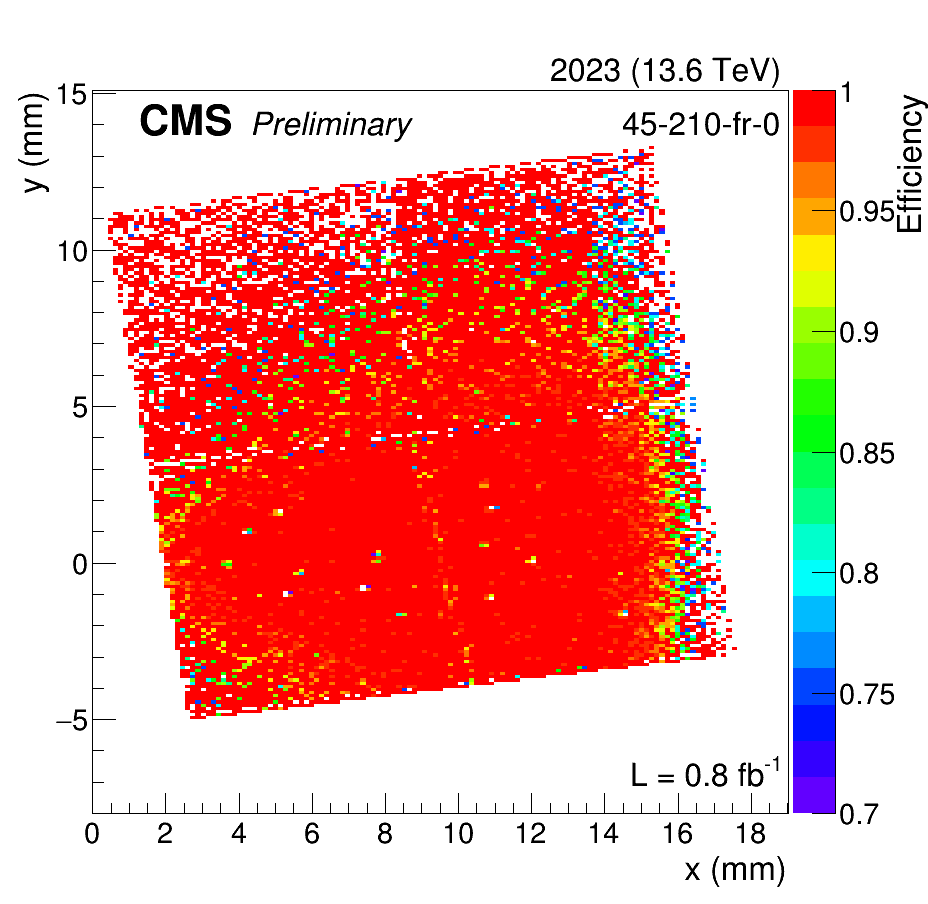

In [75]:
# Plot plane efficiency 45-210-fr-0
run = 366933
sector = '45'
station = '0'
plane = '0'

if not os.path.isdir(outputFolder):
    print('Folder '+outputFolder+' not found. Creating it...')
    os.mkdir(outputFolder)

rootFile_pattern = '/eos/cms/store/group/dpg_ctpps/comm_ctpps/pps-automation/dev/pps-test-re-tracking-efficiency/test_efficiency_era/pps-test-re-tracking-efficiency/{run}/outputEfficiencyAnalysisDQMHarvester_run{run}.root'

rootFile = rootFile_pattern.format(run=run)
foundLumi = False
lumiRun = run
while not foundLumi:
    try:
        intLumi = float(pps_2023_track_df[pps_2023_track_df['run'] == lumiRun].iloc[[0]]['integrated_del_lumi'])
        foundLumi = True
    except IndexError as e:
        lumiRun += 1

if lumiRun != run:
    print('Found no lumi for run '+str(run)+'. Used lumi from run '+str(lumiRun))

c = makePlaneEfficiencyPlot(rootFile,sector,station,plane,True,addRunNumber=False,addIntLumi=True,intLumi=intLumi)
c.DrawClone()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file plots//plane_eff_56_220_2_366933.png has been created


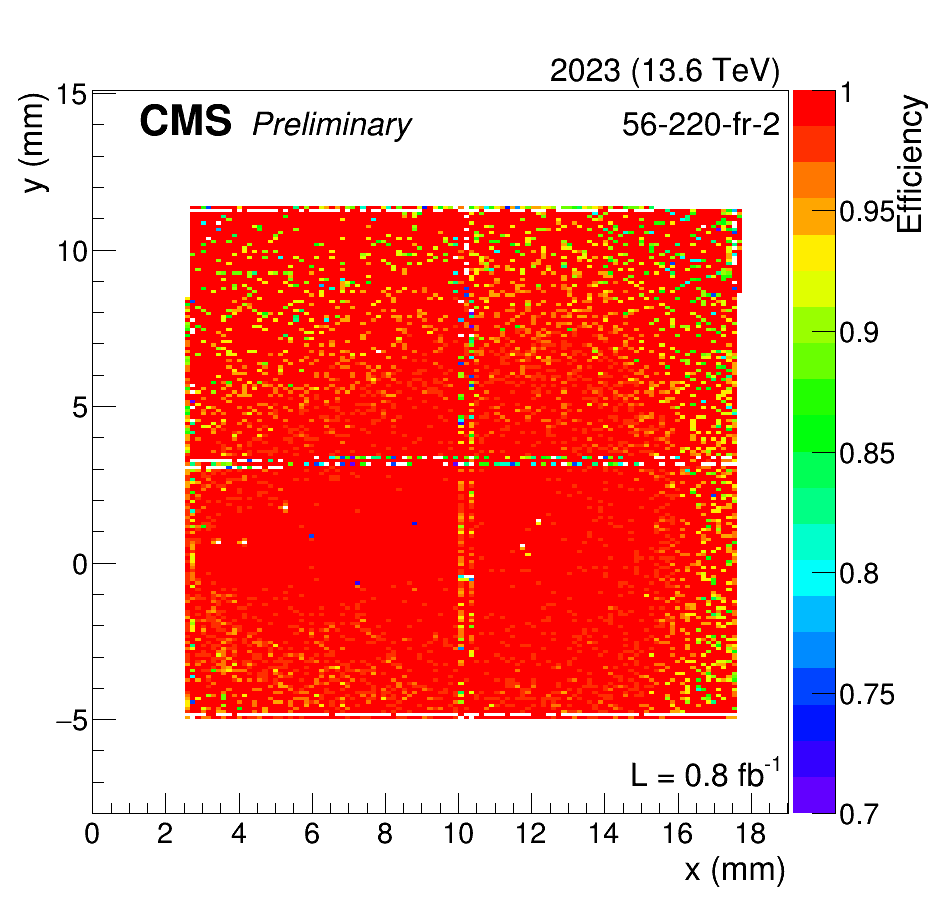

In [76]:
# Plot plane efficiency 56-220-fr-2
run = 366933
sector = '56'
station = '2'
plane = '2'

if not os.path.isdir(outputFolder):
    print('Folder '+outputFolder+' not found. Creating it...')
    os.mkdir(outputFolder)

rootFile_pattern = '/eos/cms/store/group/dpg_ctpps/comm_ctpps/pps-automation/dev/pps-test-re-tracking-efficiency/test_efficiency_era/pps-test-re-tracking-efficiency/{run}/outputEfficiencyAnalysisDQMHarvester_run{run}.root'

rootFile = rootFile_pattern.format(run=run)
foundLumi = False
lumiRun = run
while not foundLumi:
    try:
        intLumi = float(pps_2023_track_df[pps_2023_track_df['run'] == lumiRun].iloc[[0]]['integrated_del_lumi'])
        foundLumi = True
    except IndexError as e:
        lumiRun += 1

if lumiRun != run:
    print('Found no lumi for run '+str(run)+'. Used lumi from run '+str(lumiRun))

c = makePlaneEfficiencyPlot(rootFile,sector,station,plane,True,addRunNumber=False,addIntLumi=True,intLumi=intLumi)
c.DrawClone()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file plots//plane_eff_45_210_0_370772.png has been created


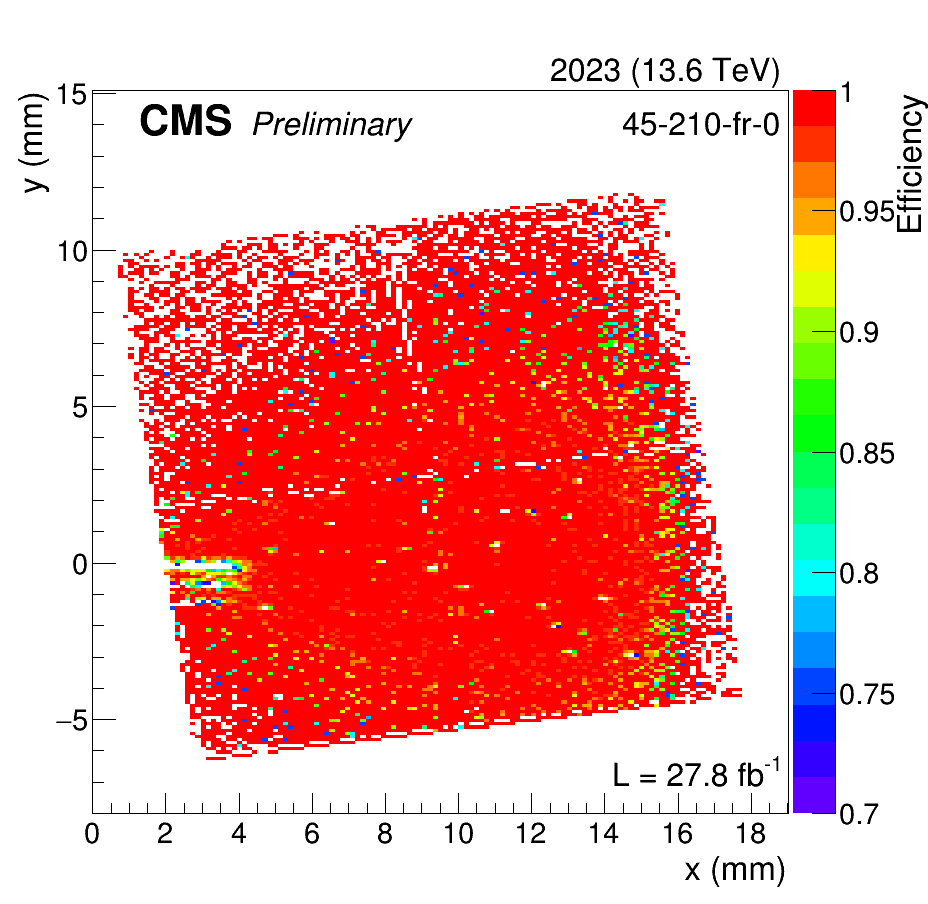

In [77]:
# Plot plane efficiency 45-210-fr-0
run = 370772
sector = '45'
station = '0'
plane = '0'

if not os.path.isdir(outputFolder):
    print('Folder '+outputFolder+' not found. Creating it...')
    os.mkdir(outputFolder)

rootFile_pattern = '/eos/cms/store/group/dpg_ctpps/comm_ctpps/pps-automation/dev/pps-test-re-tracking-efficiency/test_efficiency_era/pps-test-re-tracking-efficiency/{run}/outputEfficiencyAnalysisDQMHarvester_run{run}.root'

rootFile = rootFile_pattern.format(run=run)
foundLumi = False
lumiRun = run
while not foundLumi:
    try:
        intLumi = float(pps_2023_track_df[pps_2023_track_df['run'] == lumiRun].iloc[[0]]['integrated_del_lumi'])
        foundLumi = True
    except IndexError as e:
        lumiRun += 1

if lumiRun != run:
    print('Found no lumi for run '+str(run)+'. Used lumi from run '+str(lumiRun))

c = makePlaneEfficiencyPlot(rootFile,sector,station,plane,True,addRunNumber=False,addIntLumi=True,intLumi=intLumi)
c.DrawClone()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file plots//plane_eff_56_220_2_370772.png has been created


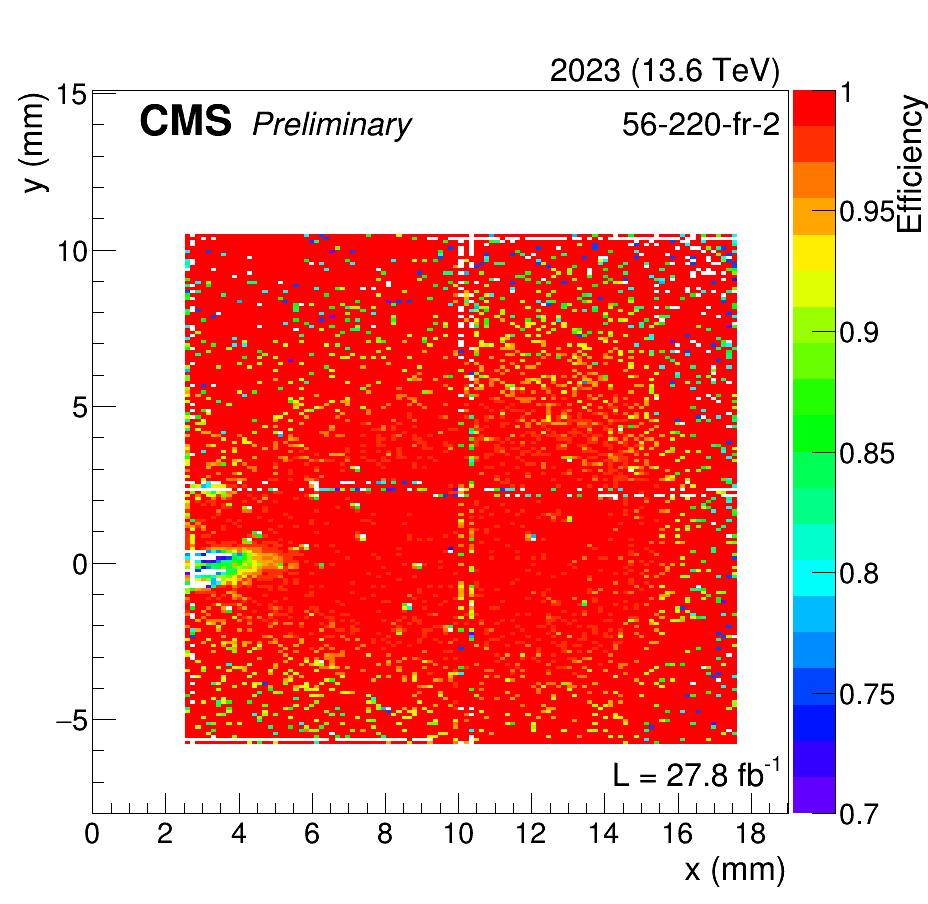

In [78]:
# Plot plane efficiency 56-220-fr-2
run = 370772
sector = '56'
station = '2'
plane = '2'

if not os.path.isdir(outputFolder):
    print('Folder '+outputFolder+' not found. Creating it...')
    os.mkdir(outputFolder)

rootFile_pattern = '/eos/cms/store/group/dpg_ctpps/comm_ctpps/pps-automation/dev/pps-test-re-tracking-efficiency/test_efficiency_era/pps-test-re-tracking-efficiency/{run}/outputEfficiencyAnalysisDQMHarvester_run{run}.root'

rootFile = rootFile_pattern.format(run=run)
foundLumi = False
lumiRun = run
while not foundLumi:
    try:
        intLumi = float(pps_2023_track_df[pps_2023_track_df['run'] == lumiRun].iloc[[0]]['integrated_del_lumi'])
        foundLumi = True
    except IndexError as e:
        lumiRun += 1

if lumiRun != run:
    print('Found no lumi for run '+str(run)+'. Used lumi from run '+str(lumiRun))

c = makePlaneEfficiencyPlot(rootFile,sector,station,plane,True,addRunNumber=False,addIntLumi=True,intLumi=intLumi)
c.DrawClone()

## Pixel unit efficiency plots

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file plots//rad_eff_45_210_366933.png has been created


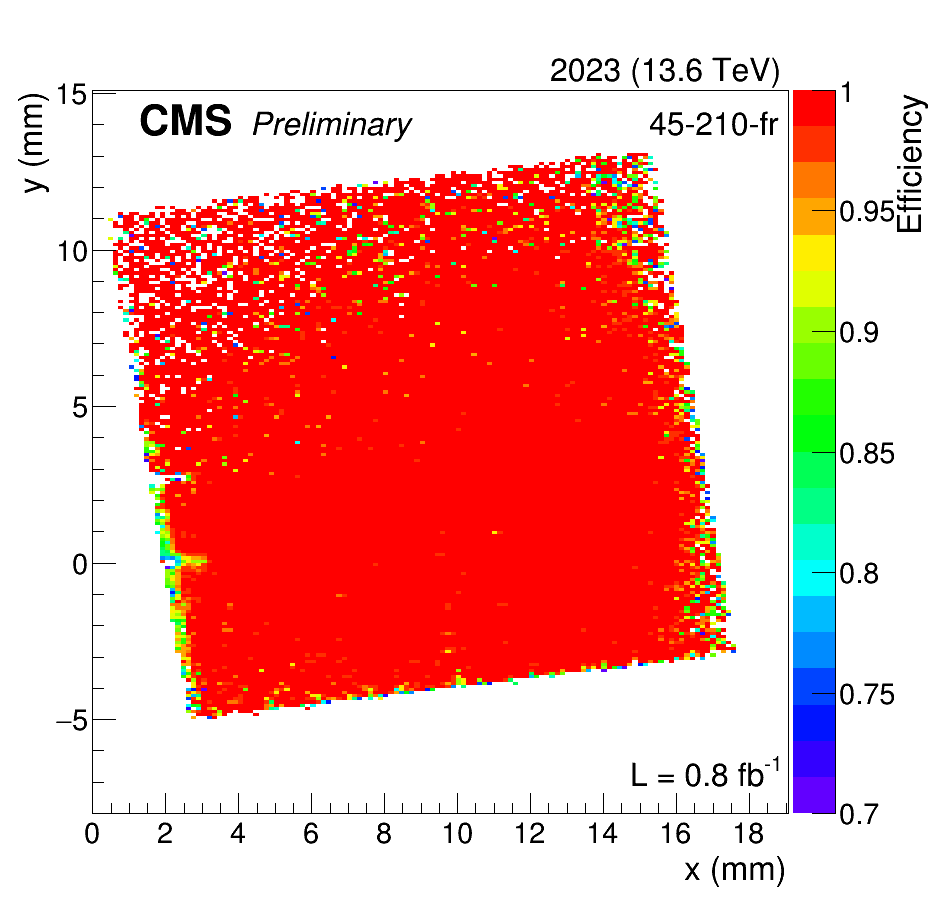

In [79]:
# Plot pixel unit efficiency 45-210-fr
run = 366933
sector = '45'
station = '0'

if not os.path.isdir(outputFolder):
    print('Folder '+outputFolder+' not found. Creating it...')
    os.mkdir(outputFolder)

rootFile_pattern = '/eos/cms/store/group/dpg_ctpps/comm_ctpps/pps-automation/dev/pps-test-re-tracking-efficiency/test_efficiency_era/pps-test-re-tracking-efficiency/{run}/outputTrackingEfficiency_run{run}.root'

rootFile = rootFile_pattern.format(run=run)
foundLumi = False
lumiRun = run
while not foundLumi:
    try:
        intLumi = float(pps_2023_track_df[pps_2023_track_df['run'] == lumiRun].iloc[[0]]['integrated_del_lumi'])
        foundLumi = True
    except IndexError as e:
        lumiRun += 1

if lumiRun != run:
    print('Found no lumi for run '+str(run)+'. Used lumi from run '+str(lumiRun))

c = makeRadiationEfficiencyPlot(rootFile,sector,station,True,addRunNumber=False,addIntLumi=True,intLumi=intLumi)
c.DrawClone()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file plots//rad_eff_56_220_366933.png has been created


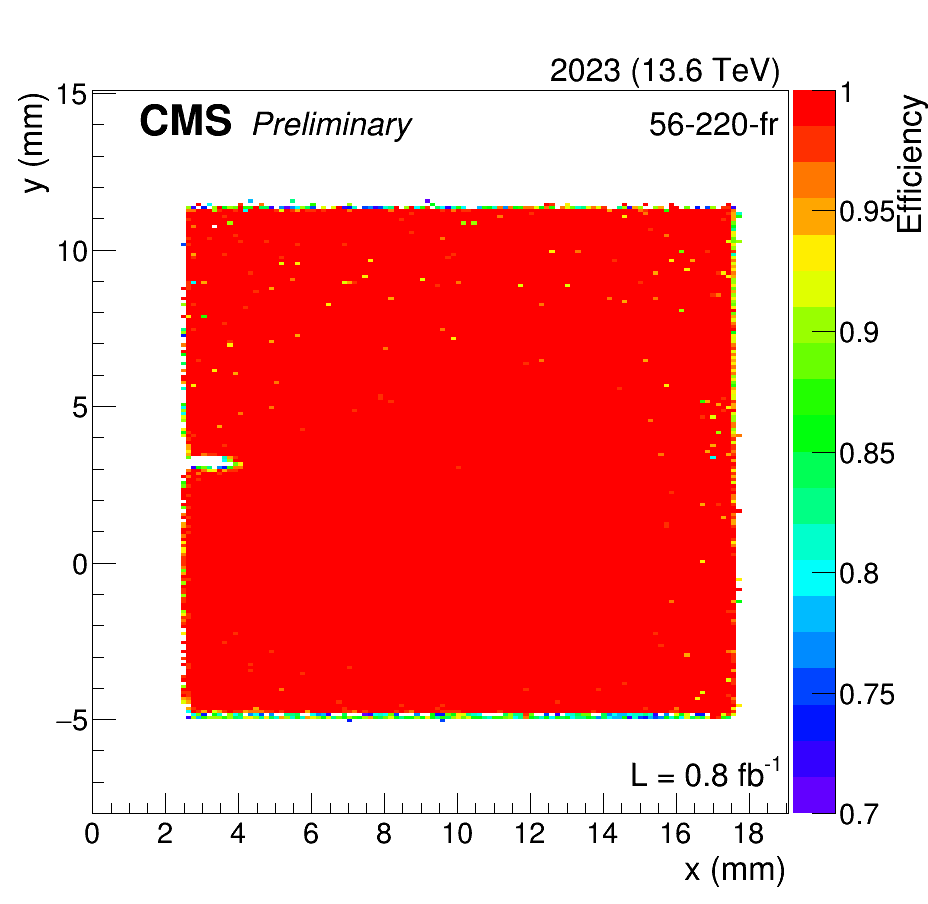

In [80]:
# Plot pixel unit efficiency 56-220-fr
run = 366933
sector = '56'
station = '2'

if not os.path.isdir(outputFolder):
    print('Folder '+outputFolder+' not found. Creating it...')
    os.mkdir(outputFolder)

rootFile_pattern = '/eos/cms/store/group/dpg_ctpps/comm_ctpps/pps-automation/dev/pps-test-re-tracking-efficiency/test_efficiency_era/pps-test-re-tracking-efficiency/{run}/outputTrackingEfficiency_run{run}.root'

rootFile = rootFile_pattern.format(run=run)
foundLumi = False
lumiRun = run
while not foundLumi:
    try:
        intLumi = float(pps_2023_track_df[pps_2023_track_df['run'] == lumiRun].iloc[[0]]['integrated_del_lumi'])
        foundLumi = True
    except IndexError as e:
        lumiRun += 1

if lumiRun != run:
    print('Found no lumi for run '+str(run)+'. Used lumi from run '+str(lumiRun))

c = makeRadiationEfficiencyPlot(rootFile,sector,station,True,addRunNumber=False,addIntLumi=True,intLumi=intLumi)
c.DrawClone()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file plots//rad_eff_45_210_370772.png has been created


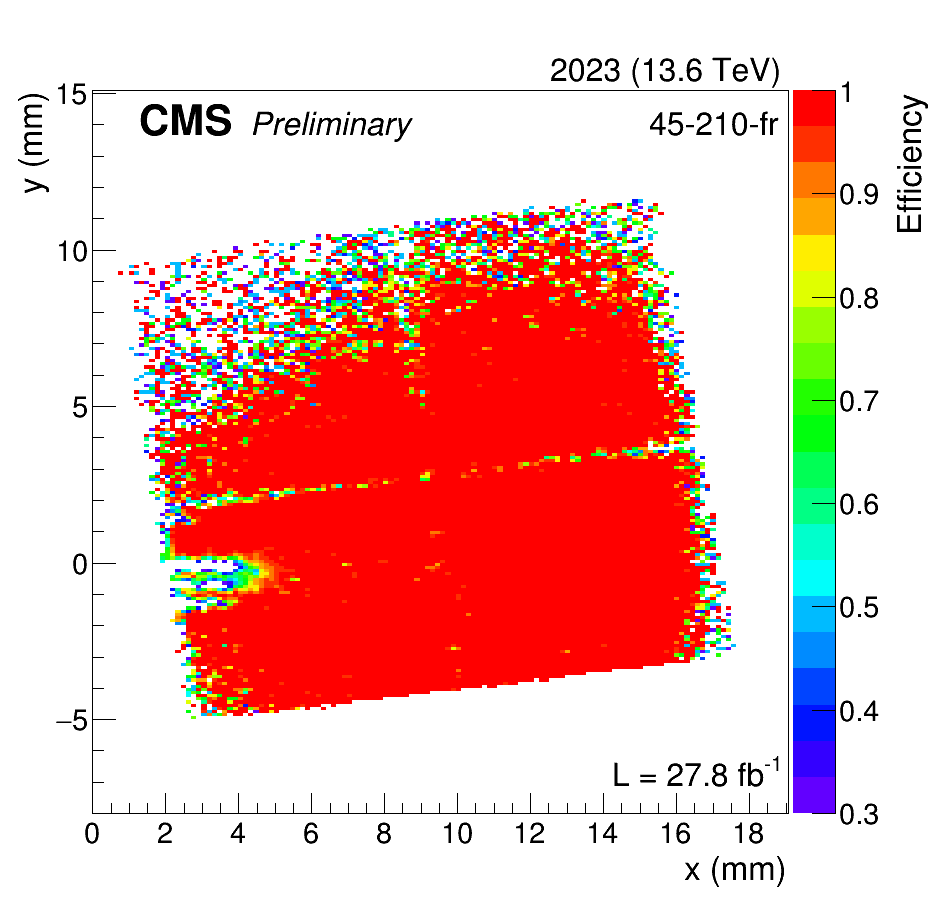

In [81]:
# Plot pixel unit efficiency 45-210-fr
run = 370772
sector = '45'
station = '0'

if not os.path.isdir(outputFolder):
    print('Folder '+outputFolder+' not found. Creating it...')
    os.mkdir(outputFolder)

rootFile_pattern = '/eos/cms/store/group/dpg_ctpps/comm_ctpps/pps-automation/dev/pps-test-re-tracking-efficiency/test_efficiency_era/pps-test-re-tracking-efficiency/{run}/outputTrackingEfficiency_run{run}.root'

rootFile = rootFile_pattern.format(run=run)
foundLumi = False
lumiRun = run
while not foundLumi:
    try:
        intLumi = float(pps_2023_track_df[pps_2023_track_df['run'] == lumiRun].iloc[[0]]['integrated_del_lumi'])
        foundLumi = True
    except IndexError as e:
        lumiRun += 1

if lumiRun != run:
    print('Found no lumi for run '+str(run)+'. Used lumi from run '+str(lumiRun))

c = makeRadiationEfficiencyPlot(rootFile,sector,station,True,addRunNumber=False,addIntLumi=True,intLumi=intLumi,z_max=0.3)
c.DrawClone()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file plots//rad_eff_56_220_370772.png has been created


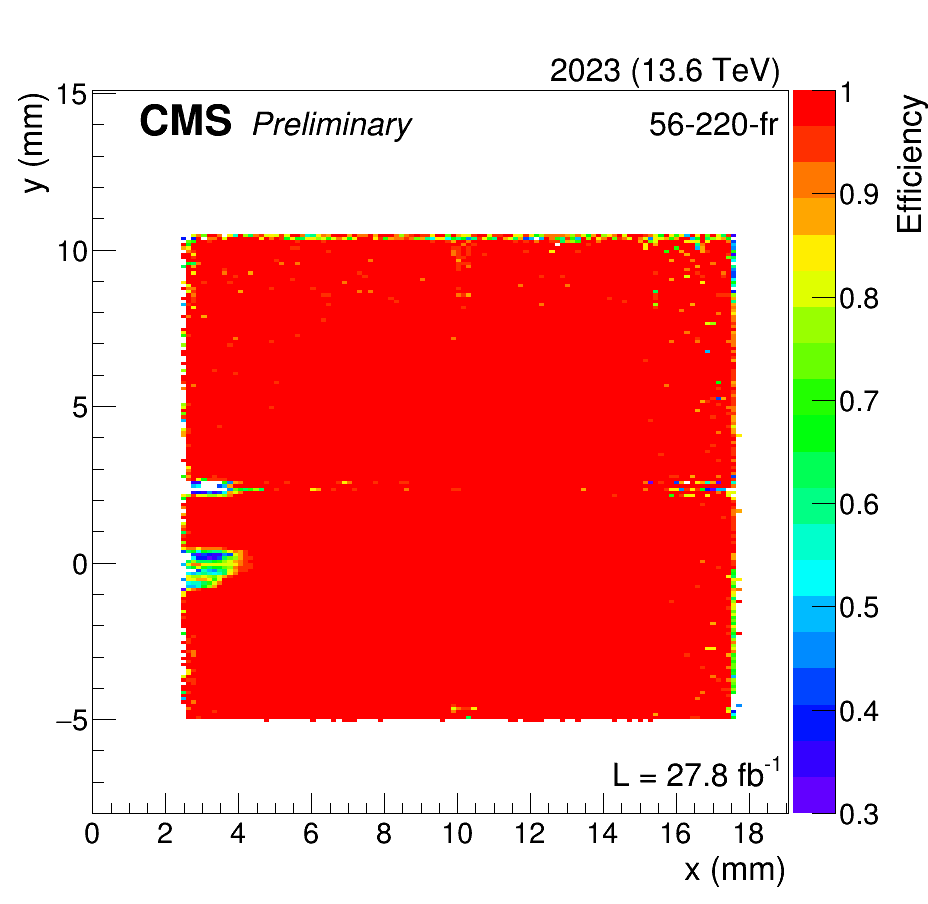

In [82]:
# Plot pixel unit efficiency 56-220-fr
run = 370772
sector = '56'
station = '2'

if not os.path.isdir(outputFolder):
    print('Folder '+outputFolder+' not found. Creating it...')
    os.mkdir(outputFolder)

rootFile_pattern = '/eos/cms/store/group/dpg_ctpps/comm_ctpps/pps-automation/dev/pps-test-re-tracking-efficiency/test_efficiency_era/pps-test-re-tracking-efficiency/{run}/outputTrackingEfficiency_run{run}.root'

rootFile = rootFile_pattern.format(run=run)
foundLumi = False
lumiRun = run
while not foundLumi:
    try:
        intLumi = float(pps_2023_track_df[pps_2023_track_df['run'] == lumiRun].iloc[[0]]['integrated_del_lumi'])
        foundLumi = True
    except IndexError as e:
        lumiRun += 1

if lumiRun != run:
    print('Found no lumi for run '+str(run)+'. Used lumi from run '+str(lumiRun))

c = makeRadiationEfficiencyPlot(rootFile,sector,station,True,addRunNumber=False,addIntLumi=True,intLumi=intLumi,z_max=0.3)
c.DrawClone()